In [5]:
# =========================
# 📘 SECTION 1: SETUP & MOUNT DRIVE
# =========================

from google.colab import drive
drive.mount('/content/drive')

# ✅ Define your main project directory
BASE_DIR = '/content/drive/MyDrive/Amazon_ML_Challenge_2025'

# Define subfolders
DATASET_DIR = f'{BASE_DIR}/dataset'
NOTEBOOKS_DIR = f'{BASE_DIR}/notebooks'
OUTPUT_DIR = f'{BASE_DIR}/o_p'
UTILS_DIR = f'{BASE_DIR}/utils'

# Define dataset file paths
TRAIN_PATH = f'{DATASET_DIR}/train.csv'
TEST_PATH = f'{DATASET_DIR}/test.csv'
SAMPLE_TEST_PATH = f'{DATASET_DIR}/sample_test.csv'
SAMPLE_TEST_OUT_PATH = f'{DATASET_DIR}/sample_test_out.csv'

print("✅ Google Drive mounted successfully!")
print("📂 Folder Paths:")
print(f"BASE_DIR:         {BASE_DIR}")
print(f"DATASET_DIR:      {DATASET_DIR}")
print(f"NOTEBOOKS_DIR:    {NOTEBOOKS_DIR}")
print(f"OUTPUT_DIR:       {OUTPUT_DIR}")
print(f"UTILS_DIR:        {UTILS_DIR}\n")

print("📄 File Paths:")
print(f"Train CSV:        {TRAIN_PATH}")
print(f"Test CSV:         {TEST_PATH}")
print(f"Sample Test CSV:  {SAMPLE_TEST_PATH}")
print(f"Sample Out CSV:   {SAMPLE_TEST_OUT_PATH}")

Mounted at /content/drive
✅ Google Drive mounted successfully!
📂 Folder Paths:
BASE_DIR:         /content/drive/MyDrive/Amazon_ML_Challenge_2025
DATASET_DIR:      /content/drive/MyDrive/Amazon_ML_Challenge_2025/dataset
NOTEBOOKS_DIR:    /content/drive/MyDrive/Amazon_ML_Challenge_2025/notebooks
OUTPUT_DIR:       /content/drive/MyDrive/Amazon_ML_Challenge_2025/o_p
UTILS_DIR:        /content/drive/MyDrive/Amazon_ML_Challenge_2025/utils

📄 File Paths:
Train CSV:        /content/drive/MyDrive/Amazon_ML_Challenge_2025/dataset/train.csv
Test CSV:         /content/drive/MyDrive/Amazon_ML_Challenge_2025/dataset/test.csv
Sample Test CSV:  /content/drive/MyDrive/Amazon_ML_Challenge_2025/dataset/sample_test.csv
Sample Out CSV:   /content/drive/MyDrive/Amazon_ML_Challenge_2025/dataset/sample_test_out.csv


In [6]:
# =========================
# 📘 SECTION 2: LOAD DATA
# =========================

import pandas as pd

# Load CSV files into DataFrames
train_df = pd.read_csv(f"{DATASET_DIR}/train.csv")
test_df = pd.read_csv(f"{DATASET_DIR}/test.csv")
sample_test_df = pd.read_csv(f"{DATASET_DIR}/sample_test.csv")
sample_test_out_df = pd.read_csv(f"{DATASET_DIR}/sample_test_out.csv")

# ✅ Confirm all data loaded
print("✅ Data Loaded Successfully!")
print(f"Train Shape:           {train_df.shape}")
print(f"Test Shape:            {test_df.shape}")
print(f"Sample Test Shape:     {sample_test_df.shape}")
print(f"Sample Test Out Shape: {sample_test_out_df.shape}\n")

# Display few sample rows from each
print("🔹 Train Data Preview:")
display(train_df.head(2))

print("🔹 Test Data Preview:")
display(test_df.head(2))

print("🔹 Sample Test Data Preview:")
display(sample_test_df.head(2))

print("🔹 Sample Test Output Preview:")
display(sample_test_out_df.head(2))

# Check for missing values
print("\n🔍 Missing Values Check (Train):")
print(train_df.isnull().sum())

# Basic info
print("\nℹ️ Train Data Info:")
print(train_df.info())


✅ Data Loaded Successfully!
Train Shape:           (75000, 4)
Test Shape:            (75000, 3)
Sample Test Shape:     (100, 3)
Sample Test Out Shape: (100, 2)

🔹 Train Data Preview:


,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12


🔹 Test Data Preview:


,sample_id,catalog_content,image_link
0,100179,Item Name: Rani 14-Spice Eshamaya's Mango Chut...,https://m.media-amazon.com/images/I/71hoAn78AW...
1,245611,Item Name: Natural MILK TEA Flavoring extract ...,https://m.media-amazon.com/images/I/61ex8NHCIj...


🔹 Sample Test Data Preview:


,sample_id,catalog_content,image_link
0,217392,Item Name: Gift Basket Village Gourmet Meat an...,https://m.media-amazon.com/images/I/91GB1wC6Ob...
1,209156,"Item Name: NPG Dried Lotus Seeds 16 Oz, Uncook...",https://m.media-amazon.com/images/I/81VnzF1vkv...


🔹 Sample Test Output Preview:


,sample_id,price
0,217392,62.080008
1,209156,17.189763



🔍 Missing Values Check (Train):
sample_id          0
catalog_content    0
image_link         0
price              0
dtype: int64

ℹ️ Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sample_id        75000 non-null  int64  
 1   catalog_content  75000 non-null  object 
 2   image_link       75000 non-null  object 
 3   price            75000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB
None


In [ ]:
# =========================
# 📘 SECTION 3: TEXT CLEANING
# =========================

import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)          # remove URLs
    text = re.sub(r"[^a-z0-9\s]", " ", text)    # remove punctuation
    text = re.sub(r"\s+", " ", text).strip()    # remove extra spaces
    return text

# Apply cleaning
train_df['clean_text'] = train_df['catalog_content'].apply(clean_text)
test_df['clean_text'] = test_df['catalog_content'].apply(clean_text)
sample_test_df['clean_text'] = sample_test_df['catalog_content'].apply(clean_text)

print("✅ Text cleaning done.")


✅ Text cleaning done.


In [ ]:
# =========================
# 📘 SECTION 4: BERT EMBEDDINGS
# =========================

!pip install -q sentence-transformers
from sentence_transformers import SentenceTransformer

# Load pretrained Sentence Transformer
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode train and test text
X_train_embed = bert_model.encode(train_df['clean_text'], show_progress_bar=True)
X_test_embed  = bert_model.encode(test_df['clean_text'], show_progress_bar=True)
X_sample_test_embed = bert_model.encode(sample_test_df['clean_text'], show_progress_bar=True)

y_train = train_df['price']

print("✅ BERT embeddings completed.")
print("Train embeddings shape:", X_train_embed.shape)
print("Test embeddings shape:", X_test_embed.shape)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/2344 [00:00<?, ?it/s]

Batches:   0%|          | 0/2344 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

✅ BERT embeddings completed.
Train embeddings shape: (75000, 384)
Test embeddings shape: (75000, 384)


In [ ]:
# =========================
# 📘 SECTION 5: FEATURE SCALING
# =========================

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_embed)
X_test_scaled  = scaler.transform(X_test_embed)
X_sample_test_scaled = scaler.transform(X_sample_test_embed)

print("✅ Feature scaling done.")


✅ Feature scaling done.


In [ ]:
# =========================
# 📘 SECTION 6: BUILD ANN MODEL
# =========================

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

tf.keras.backend.clear_session()

ann_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')  # Regression output
])

ann_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mae',  # mean absolute error
    metrics=['mae']
)

ann_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361,473 (1.38 MB)

 Trainable params: 361,473 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# =========================
# 📘 SECTION 7: TRAIN ANN MODEL
# =========================

history = ann_model.fit(
    X_train_scaled, y_train,
    epochs=15,
    batch_size=256,
    verbose=1,
    validation_split=0.1  # small validation for monitoring
)


Epoch 1/15
264/264 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 15.6466 - mae: 15.6466 - val_loss: 13.9851 - val_mae: 13.9851
Epoch 2/15
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14.0400 - mae: 14.0400 - val_loss: 13.9129 - val_mae: 13.9129
Epoch 3/15
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13.3259 - mae: 13.3259 - val_loss: 13.6250 - val_mae: 13.6250
Epoch 4/15
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13.0386 - mae: 13.0386 - val_loss: 13.3795 - val_mae: 13.3795
Epoch 5/15
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12.8418 - mae: 12.8418 - val_loss: 13.3314 - val_mae: 13.3314
Epoch 6/15
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12.6381 - mae: 12.6381 - val_loss: 13.3202 - val_mae: 13.3202
Epoch 7/15
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12.5737 - mae: 12.5737 - val_loss: 13.3206 - val_mae: 13.3206
Epoch 8/15
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12.7138 - mae: 12.7138 - val_loss: 13.1550 - val_mae: 13.1550
Epoch 9/15
264/264 ━━━

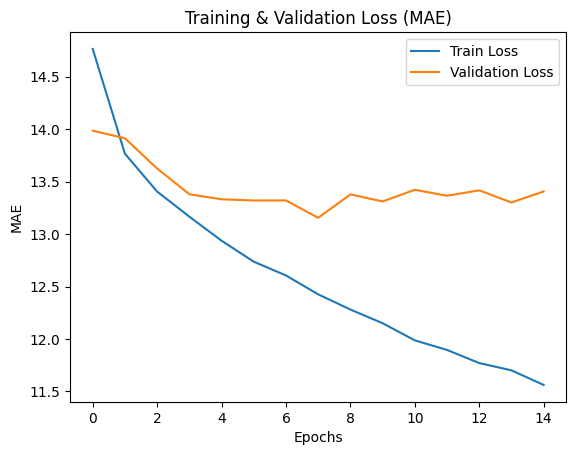

In [ ]:
# =========================
# 📘 SECTION 8: PLOT TRAINING HISTORY
# =========================

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [ ]:
# =========================
# 📘 SECTION 9: SMAPE FUNCTION
# =========================

import numpy as np

def smape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100


In [ ]:
# =========================
# 📘 SECTION 10: VALIDATION SMAPE
# =========================

# Using last 10% split validation from training
val_split_index = int(0.9 * len(X_train_scaled))
X_val = X_train_scaled[val_split_index:]
y_val = y_train[val_split_index:]

y_val_pred = ann_model.predict(X_val).flatten()
val_smape = smape(y_val, y_val_pred)
print(f"✅ Validation SMAPE: {val_smape:.4f}%")


235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
✅ Validation SMAPE: 59.7791%


In [ ]:
# =========================
# 📘 SECTION 11: PREDICT ON TEST SETS
# =========================

import os
import numpy as np
import pandas as pd

# Predict on main test.csv
y_test_pred = ann_model.predict(X_test_scaled).flatten()
y_test_pred = np.maximum(y_test_pred, 0)  # ensure positive prices

# Predict on sample_test.csv (if needed)
y_sample_test_pred = ann_model.predict(X_sample_test_scaled).flatten()
y_sample_test_pred = np.maximum(y_sample_test_pred, 0)

# Save outputs
test_output_path = f"{OUTPUT_DIR}/test_predictions.csv"
sample_output_path = f"{OUTPUT_DIR}/sample_test_predictions.csv"

# Create the output directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)

pd.DataFrame({
    'sample_id': test_df['sample_id'],
    'price': y_test_pred
}).to_csv(test_output_path, index=False)

pd.DataFrame({
    'sample_id': sample_test_df['sample_id'],
    'price': y_sample_test_pred
}).to_csv(sample_output_path, index=False)

print(f"✅ Test predictions saved: {test_output_path}")
print(f"✅ Sample test predictions saved: {sample_output_path}")

2344/2344 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
✅ Test predictions saved: /content/drive/MyDrive/Amazon_ML_Challenge_2025/o_p/test_predictions.csv
✅ Sample test predictions saved: /content/drive/MyDrive/Amazon_ML_Challenge_2025/o_p/sample_test_predictions.csv


In [ ]:
# =========================
# 📘 SECTION 12: SAVE BERT MODEL
# =========================

import os

# Define the path to save the BERT model
bert_model_path = f"{BASE_DIR}/models/bert_model"

# Create the models directory if it doesn't exist
os.makedirs(os.path.dirname(bert_model_path), exist_ok=True)

# Save the model
bert_model.save(bert_model_path)

print(f"✅ BERT model saved successfully to: {bert_model_path}")

✅ BERT model saved successfully to: /content/drive/MyDrive/Amazon_ML_Challenge_2025/models/bert_model


In [ ]:
# =========================
# 📘 SECTION 13: GET TEXT EMBEDDINGS FROM TRAINED MODEL
# =========================

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model

# Extract embeddings from the *second last dense layer* (128-dim layer)
# Create a new model that outputs the desired layer's output
embedding_extractor = Model(
    inputs=ann_model.inputs,
    outputs=ann_model.layers[-2].output
)

# Generate embeddings for train and test sets
text_train_embeddings = embedding_extractor.predict(X_train_scaled, batch_size=256, verbose=1)
text_test_embeddings  = embedding_extractor.predict(X_test_scaled, batch_size=256, verbose=1)

print("✅ Text embeddings extracted!")
print("Train embeddings shape:", text_train_embeddings.shape)
print("Test embeddings shape:", text_test_embeddings.shape)

# Optionally save for later CNN + text concatenation
np.save(f"{OUTPUT_DIR}/text_train_embeddings.npy", text_train_embeddings)
np.save(f"{OUTPUT_DIR}/text_test_embeddings.npy", text_test_embeddings)
print("💾 Embeddings saved to:", OUTPUT_DIR)

293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
✅ Text embeddings extracted!
Train embeddings shape: (75000, 128)
Test embeddings shape: (75000, 128)
💾 Embeddings saved to: /content/drive/MyDrive/Amazon_ML_Challenge_2025/o_p


In [ ]:
# =========================
# 📘 SECTION 14: PREPROCESS SAMPLE_TEST FOR BERT
# =========================

import pandas as pd
import re

# Load sample_test.csv
sample_test_df = pd.read_csv(f"{DATASET_DIR}/sample_test.csv")

# Clean text (same as training)
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

sample_test_df['clean_text'] = sample_test_df['catalog_content'].apply(clean_text)

# Generate BERT embeddings using the trained BERT model
X_sample_test_embed = bert_model.encode(sample_test_df['clean_text'], show_progress_bar=True)

# Scale embeddings using the trained scaler
X_sample_test_scaled = scaler.transform(X_sample_test_embed)

print("✅ Sample test data preprocessed and BERT embeddings ready.")


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

✅ Sample test data preprocessed and BERT embeddings ready.


In [ ]:
# =========================
# 📘 SECTION 15: PREDICT PRICES ON SAMPLE_TEST
# =========================

# Predict prices using trained ANN
y_sample_test_pred = ann_model.predict(X_sample_test_scaled, batch_size=256).flatten()

# Ensure all predictions are positive
y_sample_test_pred = np.maximum(y_sample_test_pred, 0)

# Add predictions to dataframe
sample_test_df['predicted_price'] = y_sample_test_pred

# Save predictions
sample_test_output_path = f"{OUTPUT_DIR}/sample_test_predictions.csv"
sample_test_df[['sample_id', 'predicted_price']].to_csv(sample_test_output_path, index=False)

print(f"✅ Predictions saved for sample_test.csv: {sample_test_output_path}")
display(sample_test_df.head(5))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
✅ Predictions saved for sample_test.csv: /content/drive/MyDrive/Amazon_ML_Challenge_2025/o_p/sample_test_predictions.csv


,sample_id,catalog_content,image_link,clean_text,predicted_price
0,217392,Item Name: Gift Basket Village Gourmet Meat an...,https://m.media-amazon.com/images/I/91GB1wC6Ob...,item name gift basket village gourmet meat and...,37.202126
1,209156,"Item Name: NPG Dried Lotus Seeds 16 Oz, Uncook...",https://m.media-amazon.com/images/I/81VnzF1vkv...,item name npg dried lotus seeds 16 oz uncooked...,10.631303
2,262333,Item Name: Annies Homegrown Macaroni and Chees...,https://m.media-amazon.com/images/I/51aCDMHMnI...,item name annies homegrown macaroni and cheese...,5.323634
3,295979,Item Name: Bear Creek Country Kitchens Creamy ...,https://m.media-amazon.com/images/I/71dzRyLGPi...,item name bear creek country kitchens creamy w...,7.215740
4,50604,Item Name: Japanese Kelp Kombu Umami Soup Stoc...,https://m.media-amazon.com/images/I/71Yu21cGwr...,item name japanese kelp kombu umami soup stock...,12.769930
